In [1]:
url = ""
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#  Import and read the hear disease data csv file
import pandas as pd
df = pd.read_csv('cleaned_df.csv')
df.head()

,GeneralHealth,LastCheckupTime,RemovedTeeth,SmokerStatus,ECigaretteUsage,AgeCategory,SleepHours,HeightInMeters,WeightInKilograms,BMI,...,HIVTesting_Yes,FluVaxLast12_No,FluVaxLast12_Yes,PneumoVaxEver_No,PneumoVaxEver_Yes,HighRiskLastYear_No,HighRiskLastYear_Yes,CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,1.0,0,0,0,0,12,9.0,1.70,90.72,31.32,...,0,0,1,0,1,1,0,0,0,1
1,2.0,0,1,0,0,12,5.0,1.55,79.38,33.07,...,0,0,1,0,1,1,0,1,0,0
2,2.0,0,0,0,0,6,7.0,1.85,120.20,34.96,...,1,0,1,1,0,1,0,1,0,0
3,2.0,0,2,0,0,12,8.0,1.63,88.00,33.30,...,0,0,1,0,1,1,0,1,0,0
4,1.0,0,1,0,0,11,8.0,1.75,74.84,24.37,...,1,0,1,0,1,1,0,0,0,1


In [2]:
df.nunique()

GeneralHealth                                                             4
LastCheckupTime                                                           4
RemovedTeeth                                                              4
SmokerStatus                                                              4
ECigaretteUsage                                                           4
                                                                         ..
HighRiskLastYear_No                                                       2
HighRiskLastYear_Yes                                                      2
CovidPos_No                                                               2
CovidPos_Tested positive using home test without a health professional    2
CovidPos_Yes                                                              2
Length: 64, dtype: int64

In [3]:
df.columns

Index(['GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'SmokerStatus',
       'ECigaretteUsage', 'AgeCategory', 'SleepHours', 'HeightInMeters',
       'WeightInKilograms', 'BMI', 'Sex_Female', 'Sex_Male',
       'PhysicalActivities_No', 'PhysicalActivities_Yes', 'HadHeartAttack_No',
       'HadHeartAttack_Yes', 'HadAngina_No', 'HadAngina_Yes', 'HadStroke_No',
       'HadStroke_Yes', 'HadAsthma_No', 'HadAsthma_Yes', 'HadSkinCancer_No',
       'HadSkinCancer_Yes', 'HadCOPD_No', 'HadCOPD_Yes',
       'HadDepressiveDisorder_No', 'HadDepressiveDisorder_Yes',
       'HadKidneyDisease_No', 'HadKidneyDisease_Yes', 'HadArthritis_No',
       'HadArthritis_Yes', 'DeafOrHardOfHearing_No', 'DeafOrHardOfHearing_Yes',
       'BlindOrVisionDifficulty_No', 'BlindOrVisionDifficulty_Yes',
       'DifficultyConcentrating_No', 'DifficultyConcentrating_Yes',
       'DifficultyWalking_No', 'DifficultyWalking_Yes',
       'DifficultyDressingBathing_No', 'DifficultyDressingBathing_Yes',
       'DifficultyE

In [4]:
new_df = df.drop(['AgeCategory', 'SleepHours', 'HeightInMeters', "WeightInKilograms", 'BMI','HadStroke_No', 'CovidPos_Tested positive using home test without a health professional',
                  'CovidPos_No','PneumoVaxEver_Yes','HadAngina_Yes'], axis=1) 

In [5]:
y = new_df['HadHeartAttack_Yes']
X = new_df.drop(columns=['HadHeartAttack_Yes', 'HadHeartAttack_No'])
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42, stratify=y)

In [6]:
logistic_regression_model = LogisticRegression(random_state=9)

# Fit and save the logistic regression model using the training data
lr_model = logistic_regression_model.fit(X_train, y_train)

training_predictions = lr_model.predict(X_train)

#Generate testing predictions
testing_predictions = logistic_regression_model.predict(X_test)

In [7]:
from sklearn.metrics import confusion_matrix

# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
print(training_matrix)

[[109464   1579]
 [  6067   2157]]


In [8]:
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print(test_matrix)

[[36493   522]
 [ 2028   713]]


In [9]:
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print(training_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    111043
           1       0.58      0.26      0.36      8224

    accuracy                           0.94    119267
   macro avg       0.76      0.62      0.66    119267
weighted avg       0.92      0.94      0.92    119267



In [10]:
# Create and save the testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     37015
           1       0.58      0.26      0.36      2741

    accuracy                           0.94     39756
   macro avg       0.76      0.62      0.66     39756
weighted avg       0.92      0.94      0.92     39756



In [11]:
X

,GeneralHealth,LastCheckupTime,RemovedTeeth,SmokerStatus,ECigaretteUsage,Sex_Female,Sex_Male,PhysicalActivities_No,PhysicalActivities_Yes,HadAngina_No,...,AlcoholDrinkers_No,AlcoholDrinkers_Yes,HIVTesting_No,HIVTesting_Yes,FluVaxLast12_No,FluVaxLast12_Yes,PneumoVaxEver_No,HighRiskLastYear_No,HighRiskLastYear_Yes,CovidPos_Yes
0,1.0,0,0,0,0,1,0,0,1,1,...,1,0,1,0,0,1,0,1,0,1
1,2.0,0,1,0,0,1,0,0,1,1,...,1,0,1,0,0,1,0,1,0,0
2,2.0,0,0,0,0,0,1,0,1,1,...,0,1,0,1,0,1,1,1,0,0
3,2.0,0,2,0,0,1,0,0,1,1,...,1,0,1,0,0,1,0,1,0,0
4,1.0,0,1,0,0,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159018,2.0,0,1,0,0,1,0,0,1,1,...,1,0,1,0,1,0,0,1,0,0
159019,2.0,0,1,3,0,0,1,1,0,1,...,0,1,0,1,0,1,1,1,0,0
159020,1.0,0,0,0,0,1,0,0,1,1,...,1,0,1,0,1,0,1,1,0,1
159021,2.0,0,1,0,0,0,1,0,1,1,...,0,1,0,1,0,1,0,1,0,1


In [12]:
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
number_input_features = len( X_train_scaled[0])
number_input_features

52

## Compile, Train and Evaluate the Model

In [14]:
number_input_features = len( X_train_scaled[0])

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=50, activation='relu', input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                2650      
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4211 (16.45 KB)
Trainable params: 4211 (16.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [16]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20


3728/3728 [==============================] - 8s 2ms/step - loss: 0.1842 - accuracy: 0.9318
Epoch 2/20
3728/3728 [==============================] - 6s 2ms/step - loss: 0.1747 - accuracy: 0.9357
Epoch 3/20
3728/3728 [==============================] - 6s 2ms/step - loss: 0.1734 - accuracy: 0.9366
Epoch 4/20
3728/3728 [==============================] - 7s 2ms/step - loss: 0.1725 - accuracy: 0.9369
Epoch 5/20
3728/3728 [==============================] - 7s 2ms/step - loss: 0.1717 - accuracy: 0.9374
Epoch 6/20
3728/3728 [==============================] - 6s 2ms/step - loss: 0.1712 - accuracy: 0.9374
Epoch 7/20
3728/3728 [==============================] - 6s 2ms/step - loss: 0.1706 - accuracy: 0.9378
Epoch 8/20
3728/3728 [==============================] - 6s 2ms/step - loss: 0.1700 - accuracy: 0.9384
Epoch 9/20
3728/3728 [==============================] - 6s 2ms/step - loss: 0.1693 - accuracy: 0.9386
Epoch 10/20
3728/3728 [==============================] - 6s 2ms/step - loss: 0.1

In [17]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1243/1243 - 2s - loss: 0.1799 - accuracy: 0.9349 - 2s/epoch - 1ms/step
Loss: 0.17993798851966858, Accuracy: 0.9348526000976562


In [18]:
#to get weights for first neural network layer
weights = nn.layers[0].get_weights()[0]

# Get the weights for all layers in the neural network
all_layer_weights = []

for layer in nn.layers:
    if hasattr(layer, 'get_weights'):
        layer_weights = layer.get_weights()
        all_layer_weights.append(layer_weights)

# Print or access the weights for each layer
for i, weights in enumerate(all_layer_weights):
    print(f"Weights for layer {i}: {weights}")

Weights for layer 0: [array([[-0.28707233,  0.20821975, -0.3342592 , ..., -0.0490015 ,
         0.7535781 ,  0.5481354 ],
       [ 0.17947295, -0.47504964,  0.44356298, ...,  0.99779946,
        -0.26427972,  0.7496391 ],
       [ 0.4723132 ,  0.03823825, -0.19144191, ...,  0.11537973,
        -0.43855157, -0.6998372 ],
       ...,
       [-0.34041116, -0.31572673,  0.2875832 , ...,  0.16450545,
        -0.3167637 ,  0.09001429],
       [ 0.00505881,  0.50261974, -0.30289164, ..., -0.49497852,
         0.05749691, -0.10109175],
       [ 0.02610719,  0.5704392 , -0.11745406, ..., -0.19037154,
         0.20971431,  0.17293943]], dtype=float32), array([-0.3266014 , -0.7953757 , -0.18184552, -0.09988187, -0.4585841 ,
       -0.5717808 , -0.08366805, -0.0048074 , -0.34967533, -0.70735204,
       -0.48498705,  0.03253385, -0.03456854, -0.53750086, -0.4066772 ,
       -0.49998355,  0.05799302, -0.20339951, -0.33729598, -0.232885  ,
       -0.4496696 , -0.3649558 , -0.5250239 , -0.10031145,  0

In [19]:
import numpy as np

num_features = len(X.columns)
# get 1st layer weights
input_layer_weights = nn.layers[0].get_weights()[0]

# calc abs sum of weights
weights_sum = np.sum((input_layer_weights), axis=1)

print("Weights for each feature(column):")
for feature_idx in range(num_features):
    print(f"Col index: {feature_idx}, Weight: {weights_sum[feature_idx]}")

Weights for each feature(column):
Col index: 0, Weight: 9.376612663269043
Col index: 1, Weight: 5.479048252105713
Col index: 2, Weight: -6.621832847595215
Col index: 3, Weight: -3.3590757846832275
Col index: 4, Weight: 0.7274976968765259
Col index: 5, Weight: 5.59019136428833
Col index: 6, Weight: -5.034121513366699
Col index: 7, Weight: -0.5945463180541992
Col index: 8, Weight: 0.6939414739608765
Col index: 9, Weight: 16.008359909057617
Col index: 10, Weight: -6.0761260986328125
Col index: 11, Weight: 2.0255894660949707
Col index: 12, Weight: -0.39308592677116394
Col index: 13, Weight: 2.0011210441589355
Col index: 14, Weight: -1.0304805040359497
Col index: 15, Weight: 2.127739667892456
Col index: 16, Weight: -2.88912034034729
Col index: 17, Weight: -1.1444494724273682
Col index: 18, Weight: -0.6916562914848328
Col index: 19, Weight: 1.0556161403656006
Col index: 20, Weight: -1.1756151914596558
Col index: 21, Weight: 2.8134546279907227
Col index: 22, Weight: -3.469895362854004
Col ind

In [20]:
X.columns

Index(['GeneralHealth', 'LastCheckupTime', 'RemovedTeeth', 'SmokerStatus',
       'ECigaretteUsage', 'Sex_Female', 'Sex_Male', 'PhysicalActivities_No',
       'PhysicalActivities_Yes', 'HadAngina_No', 'HadStroke_Yes',
       'HadAsthma_No', 'HadAsthma_Yes', 'HadSkinCancer_No',
       'HadSkinCancer_Yes', 'HadCOPD_No', 'HadCOPD_Yes',
       'HadDepressiveDisorder_No', 'HadDepressiveDisorder_Yes',
       'HadKidneyDisease_No', 'HadKidneyDisease_Yes', 'HadArthritis_No',
       'HadArthritis_Yes', 'DeafOrHardOfHearing_No', 'DeafOrHardOfHearing_Yes',
       'BlindOrVisionDifficulty_No', 'BlindOrVisionDifficulty_Yes',
       'DifficultyConcentrating_No', 'DifficultyConcentrating_Yes',
       'DifficultyWalking_No', 'DifficultyWalking_Yes',
       'DifficultyDressingBathing_No', 'DifficultyDressingBathing_Yes',
       'DifficultyErrands_No', 'DifficultyErrands_Yes', 'ChestScan_No',
       'ChestScan_Yes', 'RaceEthnicityCategory_Black only, Non-Hispanic',
       'RaceEthnicityCategory_Hispanic

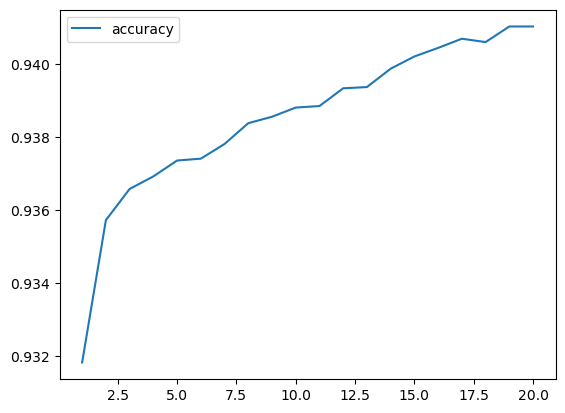

In [21]:
import matplotlib.pyplot as plt

history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()